In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import pickle
import joblib
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import utils as np_utils
from keras import layers
from keras import utils
import tensorflow_addons as tfa
from keras.metrics import Precision
from keras.metrics import Recall
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Flatten
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import LSTM
from sklearn.utils import shuffle
import xgboost as xgb

In [2]:
sqli_1 = pd.read_csv("SQL_injection\sqli.csv", encoding='utf-16')

In [3]:
sqli_1

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
4195,"org/?option = com_k2 <a href = ""http://corfopym",0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0
4197,picsearch,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0


In [4]:
sqli_1[1120:1140]

,Sentence,Label
1120,%28,1
1121,%29,1
1122,%26,1
1123,%21,1
1124,' or '' = ',1
1125,' or 3 = 3,1
1126,or 3 = 3 --,1
1127,NaN,1
1128,Add plain text Ne te quaesiveris extra,0
1129,"Man star; soul Render honest perfect man, Com...",0


In [5]:
sqli_1 = sqli_1.dropna()
sqli_1

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
4195,"org/?option = com_k2 <a href = ""http://corfopym",0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0
4197,picsearch,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0


In [6]:
sqli_2 = pd.read_csv("SQL_injection\sqli2.csv", encoding='utf-16')

In [7]:
sqli_2.iloc[99]['Sentence']

'"a"" or 1 = 1--"'

In [8]:
sqli_2 = sqli_2.dropna()

In [9]:
sqli_3 = pd.read_csv("SQL_injection\sqli3.csv", encoding = 'utf-8')

In [10]:
sqli_3

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
30915,DELETE FROM tomorrow,0,NaN,NaN
30916,SELECT wide ( s ) FROM west,0,NaN,NaN
30917,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN


In [11]:
sqli_3 = sqli_3.drop(['Unnamed: 2','Unnamed: 3'], axis=1)

In [12]:
sqli_3

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [13]:
sqli_3 = sqli_3.dropna()

In [14]:
sqli_3

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [15]:
sqli = pd.concat([sqli_1, sqli_2, sqli_3], axis=0)

In [16]:
sqli

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [17]:
sqli['Label'].value_counts()

0                                                                         25364
0                                                                         19268
1                                                                         12580
1                                                                         11341
 --                                                                          11
waitfor delay '0:0:__TIME__'--                                                4
 DROP TABLE Suppliers                                                         2
 SELECT column_name ( s )                                                     1
SELECT SUM ( Quantity )                                                       1
 SELECT * FROM Customers                                                      1
SELECT TOP 3 * FROM Customers                                                 1
  EXEC SelectAllCustomers                                                     1
 SELECT * FROM CustomersFETCH FIRST 50 P

In [18]:
sqli = sqli[(sqli['Label'] == '1') | (sqli['Label'] == '0') | (sqli['Label'] == 1) | (sqli['Label'] == 0)]

In [19]:
sqli['Label'] = sqli['Label'].astype(int)

C:\Users\Vladislav\AppData\Local\Temp\ipykernel_17744\1119427427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqli['Label'] = sqli['Label'].astype(int)


In [20]:
sqli['Label'].value_counts()

0    44632
1    23921
Name: Label, dtype: int64

In [21]:
sqli

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


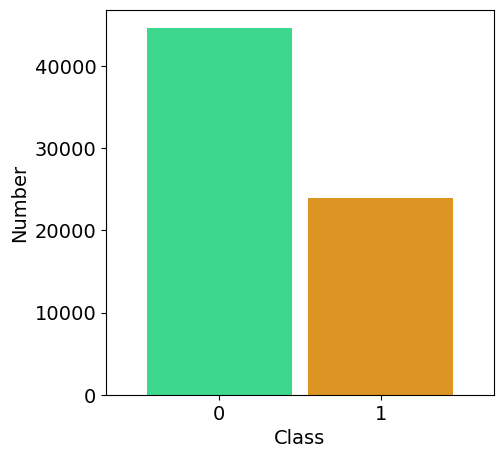

In [22]:
plt.figure(figsize=[5,5])
sqli.Label.value_counts().plot(kind='bar', width=0.9, color=['#3DD88E','#DC9423'])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [23]:
X = sqli['Sentence']
y = sqli['Label']

In [24]:
X

0                                                   a
1                                                 a' 
2                                               a' --
3                                     a' or 1 = 1; --
4                                                   @
                             ...                     
30914           DELETE FROM door WHERE grow = 'small'
30915                            DELETE FROM tomorrow
30916                    SELECT wide ( s )  FROM west
30917    SELECT * FROM  ( SELECT slide FROM breath ) 
30918                        SELECT TOP 3 * FROM race
Name: Sentence, Length: 68553, dtype: object

In [25]:
y

0        1
1        1
2        1
3        1
4        1
        ..
30914    0
30915    0
30916    0
30917    0
30918    0
Name: Label, Length: 68553, dtype: int32

In [26]:
vectorizer = TfidfVectorizer(max_features = 1000)

In [27]:
X = vectorizer.fit_transform(X.values)

In [28]:
X

<68553x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 274974 stored elements in Compressed Sparse Row format>

In [29]:
X.shape

(68553, 1000)

In [30]:
pickle.dump(vectorizer, open('Tf-idf-sql_injection.sav', 'wb'))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
algorithms = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost']

In [33]:
metrics_list = []

In [34]:
x_train

<51414x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 206064 stored elements in Compressed Sparse Row format>

In [35]:
y_train

23317    0
7317     1
24184    0
16070    0
24435    0
        ..
33011    0
2080     0
16981    0
860      1
11612    1
Name: Label, Length: 51414, dtype: int32

In [36]:
matrix_labels = ['sql_injection','not_sql_injection']

In [37]:
classifiers = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None), 
RandomForestClassifier(n_estimators = 10), xgb.XGBClassifier(random_state=42), CatBoostClassifier(task_type="GPU", devices='0:1')]

In [38]:
classifiers[4]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [39]:
k = 0
for i in classifiers:
    i.fit(x_train, y_train)
    if k==4:
        pickle.dump(i, open('XGBoost_injection.sav', 'wb'))
    y_pred = i.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    metrics_list.append({'Accuracy': accuracy,
                        'Precision': precision,
                        'Recall': recall,
                        'F1-score': f1,
                        'fpr': fpr,
                        'tpr': tpr})
        
    print("Evaluation metrics of " + algorithms[k]+" algorithm: ")
    print('Accuracy: ', accuracy)  
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1-score: ', f1)
    
    k = k + 1

Evaluation metrics of Naive Bayes algorithm: 
Accuracy:  0.9721103915047552
Precision:  0.975103021978022
Recall:  0.9446107784431138
F1-score:  0.9596147347076716
Evaluation metrics of Logistic Regression algorithm: 
Accuracy:  0.9887391329715852
Precision:  0.9955714529041049
Recall:  0.9722222222222222
F1-score:  0.9837583101910291
Evaluation metrics of Decision tree algorithm: 
Accuracy:  0.9916564560359414
Precision:  0.9949401248102547
Recall:  0.9812042581503659
F1-score:  0.9880244535633532
Evaluation metrics of Random Forest algorithm: 
Accuracy:  0.9926483458778225
Precision:  0.9976327358809605
Recall:  0.9813705921490352
F1-score:  0.9894348482307563
Evaluation metrics of XGBoost algorithm: 
Accuracy:  0.9908979520392088
Precision:  0.9972826086956522
Recall:  0.9767132401862941
F1-score:  0.986890756302521
Learning rate set to 0.027143
0:	learn: 0.6561894	total: 34.3ms	remaining: 34.3s
1:	learn: 0.6211774	total: 47.2ms	remaining: 23.5s
2:	learn: 0.5840238	total: 61.2ms	rem

147:	learn: 0.0853844	total: 1.96s	remaining: 11.3s
148:	learn: 0.0852385	total: 1.97s	remaining: 11.3s
149:	learn: 0.0850119	total: 1.98s	remaining: 11.2s
150:	learn: 0.0845237	total: 2s	remaining: 11.2s
151:	learn: 0.0841428	total: 2.01s	remaining: 11.2s
152:	learn: 0.0838503	total: 2.02s	remaining: 11.2s
153:	learn: 0.0837476	total: 2.04s	remaining: 11.2s
154:	learn: 0.0836177	total: 2.05s	remaining: 11.2s
155:	learn: 0.0829930	total: 2.07s	remaining: 11.2s
156:	learn: 0.0827674	total: 2.09s	remaining: 11.2s
157:	learn: 0.0825224	total: 2.1s	remaining: 11.2s
158:	learn: 0.0824289	total: 2.12s	remaining: 11.2s
159:	learn: 0.0823159	total: 2.14s	remaining: 11.2s
160:	learn: 0.0821547	total: 2.15s	remaining: 11.2s
161:	learn: 0.0820724	total: 2.16s	remaining: 11.2s
162:	learn: 0.0819541	total: 2.18s	remaining: 11.2s
163:	learn: 0.0815106	total: 2.19s	remaining: 11.2s
164:	learn: 0.0812879	total: 2.2s	remaining: 11.2s
165:	learn: 0.0811764	total: 2.22s	remaining: 11.2s
166:	learn: 0.081

311:	learn: 0.0624474	total: 4.5s	remaining: 9.93s
312:	learn: 0.0624183	total: 4.52s	remaining: 9.91s
313:	learn: 0.0623427	total: 4.53s	remaining: 9.89s
314:	learn: 0.0622935	total: 4.54s	remaining: 9.88s
315:	learn: 0.0621543	total: 4.55s	remaining: 9.85s
316:	learn: 0.0620722	total: 4.56s	remaining: 9.83s
317:	learn: 0.0620205	total: 4.58s	remaining: 9.82s
318:	learn: 0.0619285	total: 4.59s	remaining: 9.81s
319:	learn: 0.0618413	total: 4.61s	remaining: 9.8s
320:	learn: 0.0618198	total: 4.63s	remaining: 9.78s
321:	learn: 0.0617990	total: 4.64s	remaining: 9.77s
322:	learn: 0.0616587	total: 4.66s	remaining: 9.76s
323:	learn: 0.0616352	total: 4.67s	remaining: 9.75s
324:	learn: 0.0613973	total: 4.69s	remaining: 9.75s
325:	learn: 0.0611959	total: 4.71s	remaining: 9.74s
326:	learn: 0.0610961	total: 4.73s	remaining: 9.73s
327:	learn: 0.0610481	total: 4.75s	remaining: 9.72s
328:	learn: 0.0610307	total: 4.76s	remaining: 9.72s
329:	learn: 0.0609277	total: 4.78s	remaining: 9.7s
330:	learn: 0.0

475:	learn: 0.0523033	total: 7.05s	remaining: 7.76s
476:	learn: 0.0522375	total: 7.07s	remaining: 7.75s
477:	learn: 0.0520350	total: 7.08s	remaining: 7.73s
478:	learn: 0.0520193	total: 7.09s	remaining: 7.72s
479:	learn: 0.0519873	total: 7.11s	remaining: 7.7s
480:	learn: 0.0519594	total: 7.12s	remaining: 7.68s
481:	learn: 0.0518708	total: 7.13s	remaining: 7.67s
482:	learn: 0.0518430	total: 7.14s	remaining: 7.65s
483:	learn: 0.0517616	total: 7.16s	remaining: 7.63s
484:	learn: 0.0517478	total: 7.17s	remaining: 7.61s
485:	learn: 0.0516723	total: 7.18s	remaining: 7.59s
486:	learn: 0.0516064	total: 7.19s	remaining: 7.58s
487:	learn: 0.0515750	total: 7.2s	remaining: 7.56s
488:	learn: 0.0515383	total: 7.22s	remaining: 7.54s
489:	learn: 0.0514612	total: 7.23s	remaining: 7.53s
490:	learn: 0.0514213	total: 7.24s	remaining: 7.51s
491:	learn: 0.0514136	total: 7.26s	remaining: 7.5s
492:	learn: 0.0513112	total: 7.28s	remaining: 7.48s
493:	learn: 0.0512639	total: 7.29s	remaining: 7.47s
494:	learn: 0.0

641:	learn: 0.0459209	total: 9.31s	remaining: 5.19s
642:	learn: 0.0458863	total: 9.32s	remaining: 5.18s
643:	learn: 0.0458694	total: 9.34s	remaining: 5.16s
644:	learn: 0.0458601	total: 9.35s	remaining: 5.14s
645:	learn: 0.0458456	total: 9.36s	remaining: 5.13s
646:	learn: 0.0458300	total: 9.37s	remaining: 5.11s
647:	learn: 0.0458203	total: 9.38s	remaining: 5.1s
648:	learn: 0.0457889	total: 9.4s	remaining: 5.08s
649:	learn: 0.0457717	total: 9.41s	remaining: 5.07s
650:	learn: 0.0457465	total: 9.42s	remaining: 5.05s
651:	learn: 0.0457268	total: 9.44s	remaining: 5.04s
652:	learn: 0.0457033	total: 9.46s	remaining: 5.03s
653:	learn: 0.0456346	total: 9.47s	remaining: 5.01s
654:	learn: 0.0456114	total: 9.49s	remaining: 5s
655:	learn: 0.0455964	total: 9.5s	remaining: 4.98s
656:	learn: 0.0455759	total: 9.52s	remaining: 4.97s
657:	learn: 0.0455511	total: 9.53s	remaining: 4.95s
658:	learn: 0.0455369	total: 9.55s	remaining: 4.94s
659:	learn: 0.0455244	total: 9.57s	remaining: 4.93s
660:	learn: 0.0455

802:	learn: 0.0423540	total: 11.6s	remaining: 2.85s
803:	learn: 0.0423342	total: 11.7s	remaining: 2.84s
804:	learn: 0.0423255	total: 11.7s	remaining: 2.83s
805:	learn: 0.0423090	total: 11.7s	remaining: 2.81s
806:	learn: 0.0423044	total: 11.7s	remaining: 2.8s
807:	learn: 0.0422918	total: 11.7s	remaining: 2.78s
808:	learn: 0.0422680	total: 11.7s	remaining: 2.77s
809:	learn: 0.0422579	total: 11.7s	remaining: 2.75s
810:	learn: 0.0422528	total: 11.8s	remaining: 2.74s
811:	learn: 0.0422468	total: 11.8s	remaining: 2.73s
812:	learn: 0.0422105	total: 11.8s	remaining: 2.71s
813:	learn: 0.0421775	total: 11.8s	remaining: 2.7s
814:	learn: 0.0421705	total: 11.8s	remaining: 2.69s
815:	learn: 0.0421526	total: 11.8s	remaining: 2.67s
816:	learn: 0.0421441	total: 11.9s	remaining: 2.65s
817:	learn: 0.0421397	total: 11.9s	remaining: 2.64s
818:	learn: 0.0421317	total: 11.9s	remaining: 2.63s
819:	learn: 0.0421227	total: 11.9s	remaining: 2.61s
820:	learn: 0.0420684	total: 11.9s	remaining: 2.6s
821:	learn: 0.0

965:	learn: 0.0398941	total: 13.9s	remaining: 488ms
966:	learn: 0.0398476	total: 13.9s	remaining: 473ms
967:	learn: 0.0398412	total: 13.9s	remaining: 459ms
968:	learn: 0.0398276	total: 13.9s	remaining: 445ms
969:	learn: 0.0398219	total: 13.9s	remaining: 430ms
970:	learn: 0.0398122	total: 13.9s	remaining: 416ms
971:	learn: 0.0398010	total: 13.9s	remaining: 401ms
972:	learn: 0.0397494	total: 14s	remaining: 387ms
973:	learn: 0.0397265	total: 14s	remaining: 373ms
974:	learn: 0.0397235	total: 14s	remaining: 358ms
975:	learn: 0.0397091	total: 14s	remaining: 344ms
976:	learn: 0.0397040	total: 14s	remaining: 330ms
977:	learn: 0.0397004	total: 14s	remaining: 315ms
978:	learn: 0.0396938	total: 14s	remaining: 301ms
979:	learn: 0.0396481	total: 14s	remaining: 287ms
980:	learn: 0.0396433	total: 14.1s	remaining: 272ms
981:	learn: 0.0396411	total: 14.1s	remaining: 258ms
982:	learn: 0.0396279	total: 14.1s	remaining: 244ms
983:	learn: 0.0396231	total: 14.1s	remaining: 229ms
984:	learn: 0.0396190	total:

In [40]:
model_dnn = Sequential()
model_dnn.add(Dense(256, input_dim=1000))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(128))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(1))
model_dnn.add(Activation('sigmoid'))
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), 
                                                                         Recall(),
                                                                         tfa.metrics.FBetaScore(num_classes=2,average="micro",threshold=0.9)])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               256256    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [41]:
y_train

23317    0
7317     1
24184    0
16070    0
24435    0
        ..
33011    0
2080     0
16981    0
860      1
11612    1
Name: Label, Length: 51414, dtype: int32

In [42]:
x_train

<51414x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 206064 stored elements in Compressed Sparse Row format>

In [43]:
x_train = x_train.toarray()

In [44]:
x_train.shape

(51414, 1000)

In [45]:
history_dnn = model_dnn.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose=1, validation_split=0.1)

Epoch 1/10
362/362 [==============================] - 7s 10ms/step - loss: 0.1077 - accuracy: 0.9766 - precision: 0.9884 - recall: 0.9444 - fbeta_score: 0.9061 - val_loss: 0.0417 - val_accuracy: 0.9916 - val_precision: 0.9976 - val_recall: 0.9772 - val_fbeta_score: 0.9852
Epoch 2/10
362/362 [==============================] - 4s 10ms/step - loss: 0.0381 - accuracy: 0.9921 - precision: 0.9970 - recall: 0.9804 - fbeta_score: 0.9875 - val_loss: 0.0396 - val_accuracy: 0.9914 - val_precision: 0.9976 - val_recall: 0.9766 - val_fbeta_score: 0.9858
Epoch 3/10
362/362 [==============================] - 3s 10ms/step - loss: 0.0350 - accuracy: 0.9928 - precision: 0.9976 - recall: 0.9818 - fbeta_score: 0.9883 - val_loss: 0.0387 - val_accuracy: 0.9922 - val_precision: 0.9970 - val_recall: 0.9796 - val_fbeta_score: 0.9870
Epoch 4/10
362/362 [==============================] - 3s 9ms/step - loss: 0.0335 - accuracy: 0.9931 - precision: 0.9979 - recall: 0.9823 - fbeta_score: 0.9889 - val_loss: 0.0393 - v

In [46]:
x_test = x_test.toarray()

In [47]:
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy_dnn))
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {:.4f}".format(accuracy_dnn))

Training Accuracy: 0.9938
Testing Accuracy: 0.9931


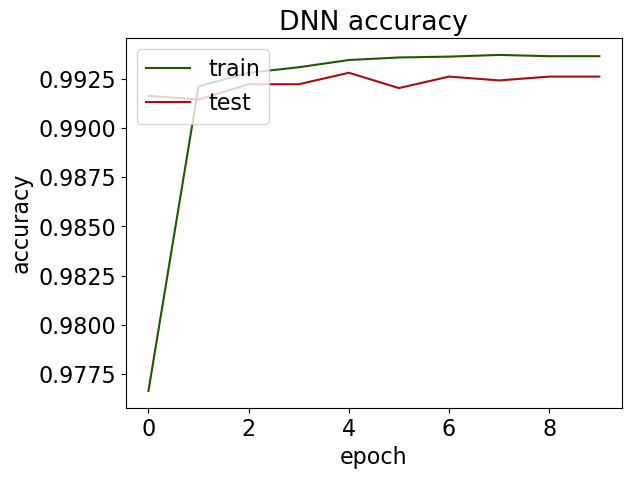

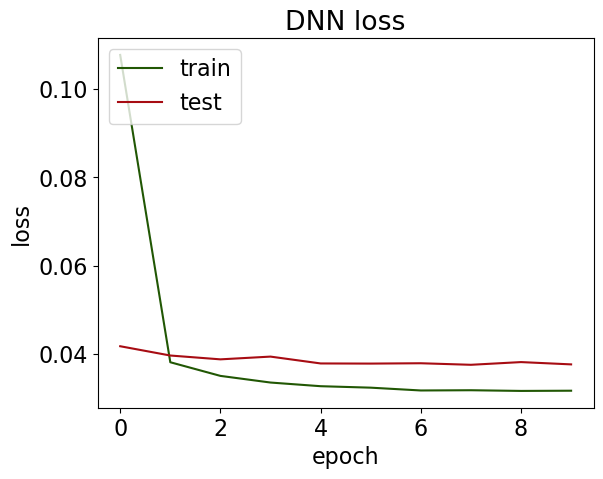

In [48]:
#plot for accuracy
plt.rcParams['font.size'] = 16
plt.plot(history_dnn.history['accuracy'], color='#215704')
plt.plot(history_dnn.history['val_accuracy'], color='#A70C13')
plt.title('DNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plot for loss
plt.plot(history_dnn.history['loss'], color='#215704')
plt.plot(history_dnn.history['val_loss'], color='#A70C13')
plt.title('DNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
y_pred = model_dnn.predict(x_test)

536/536 [==============================] - 1s 2ms/step


In [50]:
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_pred))

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [52]:
print("Scores:")
print("Accuracy - " + str(accuracy))
print("Precision - " + str(precision))
print("Recall - " + str(recall))
print("F1-score - " + str(f1_score))

Scores:
Accuracy - 0.9931151175681195
Precision - 0.9991531165311653
Recall - 0.9812042581503659
F1-score - 0.9900973481033905


In [53]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [54]:
metrics_list.append({'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-score': f1,
                    'fpr': fpr,
                    'tpr': tpr})

In [55]:
metrics_list

[{'Accuracy': 0.9721103915047552,
  'Precision': 0.975103021978022,
  'Recall': 0.9446107784431138,
  'F1-score': 0.9596147347076716,
  'fpr': array([0.        , 0.01303137, 1.        ]),
  'tpr': array([0.        , 0.94461078, 1.        ])},
 {'Accuracy': 0.9887391329715852,
  'Precision': 0.9955714529041049,
  'Recall': 0.9722222222222222,
  'F1-score': 0.9837583101910291,
  'fpr': array([0.        , 0.00233666, 1.        ]),
  'tpr': array([0.        , 0.97222222, 1.        ])},
 {'Accuracy': 0.9915397631133672,
  'Precision': 0.9949384174118441,
  'Recall': 0.9808715901530273,
  'F1-score': 0.987854929223553,
  'fpr': array([0.        , 0.00269614, 1.        ]),
  'tpr': array([0.        , 0.98087159, 1.        ])},
 {'Accuracy': 0.9928233852616839,
  'Precision': 0.9984763839512443,
  'Recall': 0.9810379241516967,
  'F1-score': 0.9896803423105965,
  'fpr': array([0.00000000e+00, 8.08843354e-04, 1.00000000e+00]),
  'tpr': array([0.        , 0.98103792, 1.        ])},
 {'Accuracy': 

In [55]:
ML_DNN_models = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost','DNN']

In [56]:
data_bar = pd.DataFrame(metrics_list, index=ML_DNN_models)

In [57]:
data_fpr_tpr = pd.DataFrame(metrics_list, index=ML_DNN_models)
data_fpr_tpr.drop(['Accuracy','Precision','Recall','F1-score'], axis=1, inplace=True)

In [58]:
data_bar.drop(['fpr','tpr'], axis=1, inplace=True)

In [59]:
tpr_list = data_fpr_tpr['tpr'].to_list()
fpr_list = data_fpr_tpr['fpr'].to_list()

In [60]:
auc_roc_list = []

In [61]:
for i in range(len(tpr_list)):
    auc_roc_list.append(metrics.auc(fpr_list[i], tpr_list[i]))

In [62]:
clrs2 = ['green',  'yellow', 'orange', 'red', 'blue', 'cyan', 'brown']

In [63]:
bar_plot_data = pd.DataFrame({
    "Accuracy": data_bar["Accuracy"].values,
    "Precision": data_bar["Precision"].values,
    "Recall": data_bar["Recall"].values,
    "F1-score": data_bar["F1-score"].values
    },
    index=["Naive Bayes","Logistic Regression","Decision tree","Random Forest","XGBoost","CatBoost","DNN"]
)

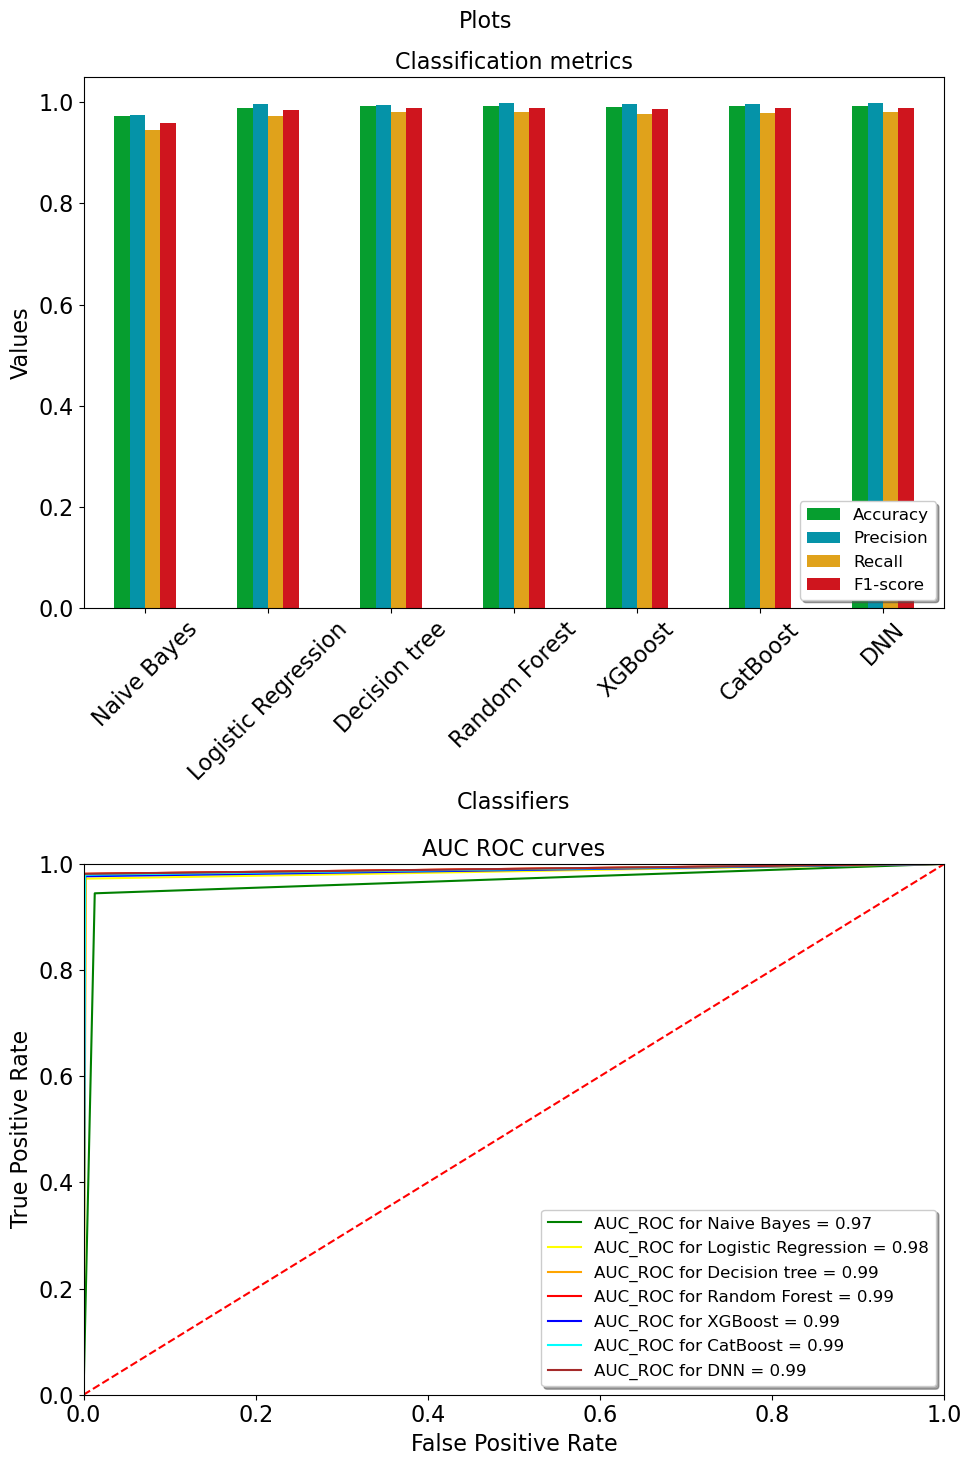

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(10,15))
fig.suptitle('Plots', fontsize = 16)
axes[0].set_title('Classification metrics', fontsize = 16)
clrs = ['#069e2f',  '#0593a8', '#e0a21b', '#cf151e']
data_bar.plot(kind="bar", ax=axes[0], color=clrs, rot=45)
axes[0].set_xlabel('Classifiers', fontsize = 16)
axes[0].set_ylabel('Values', fontsize = 16)
axes[0].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)

axes[1].set_title('AUC ROC curves', fontsize = 16)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('True Positive Rate', fontsize = 16)
axes[1].set_xlabel('False Positive Rate', fontsize = 16)
for i in range(len(auc_roc_list)):
    axes[1].plot(fpr_list[i], tpr_list[i], clrs2[i], label = 'AUC_ROC for ' + ML_DNN_models[i] + ' = %0.2f' % auc_roc_list[i])

axes[1].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)
fig.tight_layout()
plt.show()

In [65]:
tf_idf_vec = pickle.load(open('Tf-idf-sql_injection.sav', 'rb'))

In [66]:
tf_idf_vec

TfidfVectorizer(max_features=1000)

In [67]:
xgboost = pickle.load(open('XGBoost_injection.sav', 'rb'))

In [69]:
xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [82]:
input_sql = sqli_3.iloc[10:15]['Sentence']

In [95]:
input_sql.iloc[4]

" AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  column_name  )   FROM   (  SELECT DISTINCT  (  column_name  )  , ROWNUM AS LIMIT FROM all_tab_columns  )   WHERE LIMIT  =  5   )    )    AND 'i'  =  'i"

In [84]:
input_sql_vec = tf_idf_vec.transform(input_sql)

In [85]:
input_sql_vec

<5x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [86]:
sql_pred = xgboost.predict(input_sql_vec)

In [88]:
sql_pred

array([1, 1, 1, 1, 1])